In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import cv2 as cv

In [2]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.fashion_mnist.load_data()

In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
print(x_train[10].min())
print(x_train[10].max())

0.0
1.0


In [5]:
from sklearn import svm

In [6]:
no_of_samples = len(x_train)

In [7]:
x_train = x_train.reshape((no_of_samples, -1))

In [8]:
clasi_svm = svm.LinearSVC(dual=False)
clasi_svm.fit(x_train,y_train)

LinearSVC(dual=False)

In [9]:
x_test = x_test.reshape((len(x_test), -1))


In [10]:
pred = clasi_svm.predict(x_test)

In [11]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.73      0.72      1000
           3       0.82      0.86      0.84      1000
           4       0.72      0.78      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.65      0.51      0.57      1000
           7       0.91      0.94      0.92      1000
           8       0.92      0.94      0.93      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , pred)

0.8402

Prediction from test data

In [13]:
predict_1  = clasi_svm.predict(x_test[10].reshape(1,-1))

In [14]:
print(predict_1 , y_test[10])

[4] 4


Predction from google image

In [15]:
from matplotlib.pyplot import *

In [21]:
img_src = 'men-s-striped-stylish-half-sleeve-casual-shirt-351539-1656167635-1.webp'
im = cv.imread(img_src , 0)
cv.imshow("", im)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [20]:
im = cv.resize(im ,(28,28))
print(im.shape)
cv.imshow(" ",im)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:

pred = clasi_svm.predict(im.reshape(1,-1))

print(pred)

[8]


: 

confustion matrix

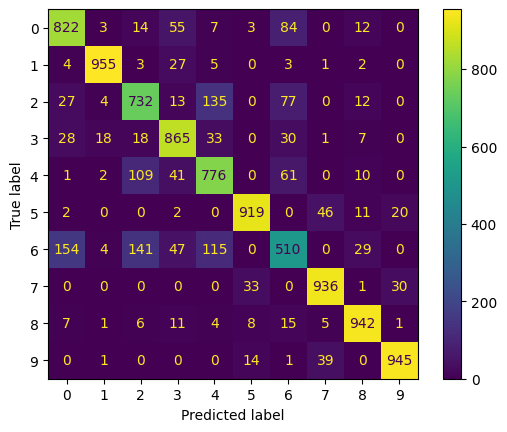

In [ ]:
conf_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [ ]:
import pickle

pkl_file = "joblib_model.pkl"
with open(pkl_file , 'wb') as file:
     pickle.dump(clasi_svm, file )